# Tidy this all up!

In [1]:
import pbjam as pb
import matplotlib.pyplot as plt
import numpy as np

In [2]:
epsilon = pb.epsilon()

In [3]:
epsilon.read_prior_data()

In [4]:
df = epsilon.prior_data
df = df.dropna()
df.head()

,KIC,Teff,Teff_err,dnu,dnu_err,numax,numax_err,bp_rp,eps,eps_err,eps_mod,log_dnu,log_numax,log_Teff
0,1162746,4989.0,100.0,3.703,0.111,27.38,0.77,1.255957,0.793286,0.029117,0.793286,0.568554,1.437433,3.698014
1,1432587,4443.0,100.0,1.070,0.013,5.38,0.30,1.537200,0.530220,0.039405,0.530220,0.029384,0.730782,3.647676
2,1433593,4956.0,100.0,6.241,0.013,69.14,0.59,1.327025,1.081346,0.009676,1.081346,0.795254,1.839729,3.695131
3,1433730,4767.0,100.0,4.085,0.019,40.37,0.54,1.424954,1.018962,0.013224,1.018962,0.611192,1.606059,3.678245
4,1435573,4821.0,100.0,3.641,0.083,25.71,0.64,1.350528,0.608582,0.025290,0.608582,0.561221,1.410102,3.683137


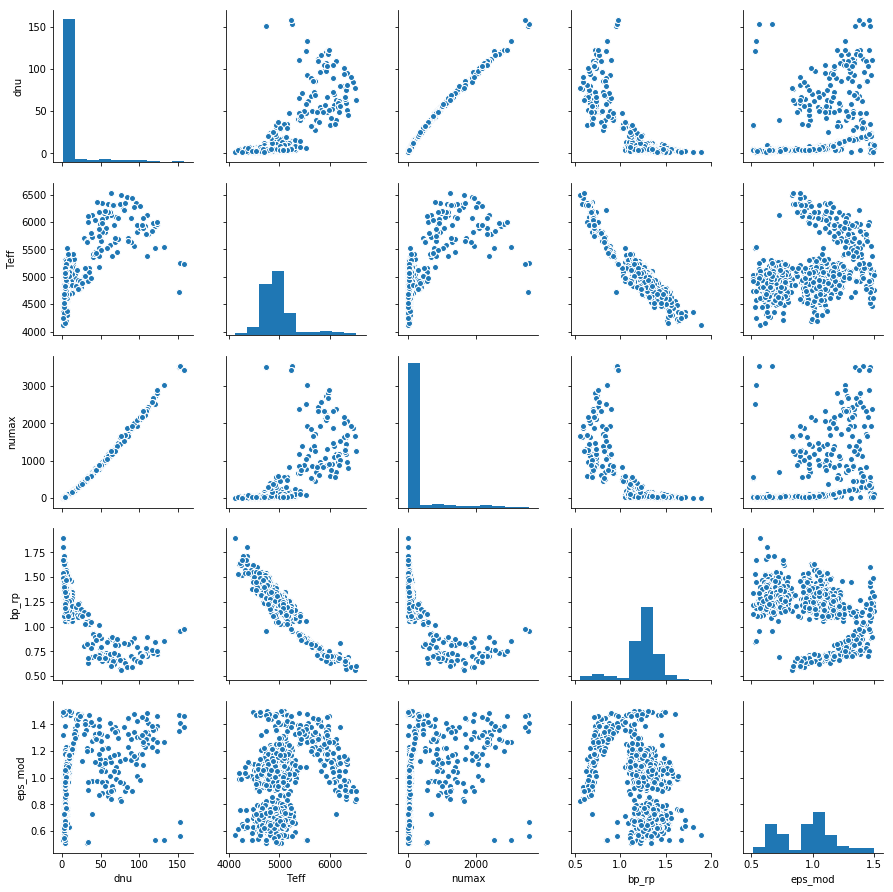

In [5]:
import seaborn as sns
sns.pairplot(df[['dnu', 'Teff', 'numax', 'bp_rp', 'eps_mod']])
plt.show()

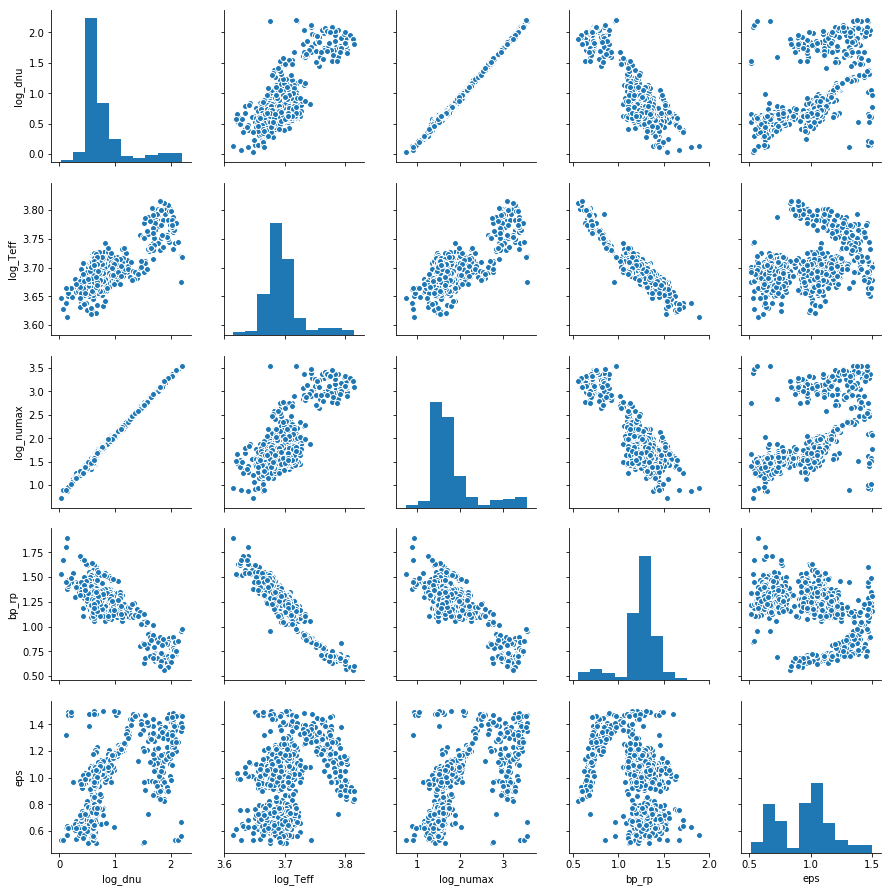

In [6]:
import seaborn as sns
sns.pairplot(df[['log_dnu', 'log_Teff', 'log_numax', 'bp_rp', 'eps']])
plt.show()

/usr/local/Cellar/python3/3.6.4_2/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/usr/local/Cellar/python3/3.6.4_2/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/usr/local/Cellar/python3/3.6.4_2/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnin

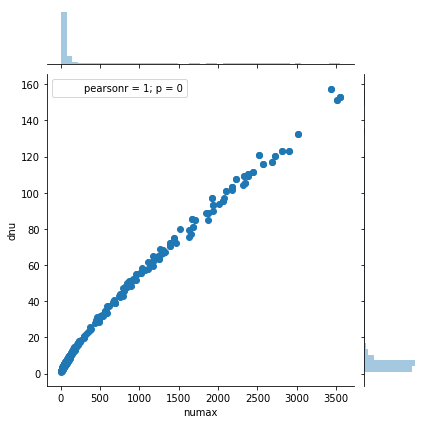

In [7]:
sns.jointplot(df['numax'], df['dnu'])

/usr/local/Cellar/python3/3.6.4_2/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/usr/local/Cellar/python3/3.6.4_2/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/usr/local/Cellar/python3/3.6.4_2/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnin

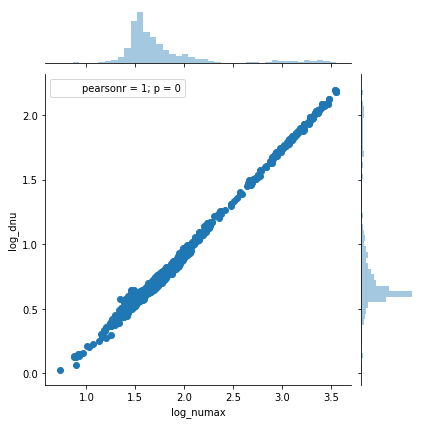

In [8]:
sns.jointplot(df['log_numax'], df['log_dnu'])

# KDE method

Describe data with KDE
Make KDE into a function including observables. (multiply result of kde with observed probability).
Then marginalise till we have a 1-D posterior/prior in epsilon.




/Users/davies/Library/Python/3.6/lib/python/site-packages/statsmodels/nonparametric/kernel_density.py:161: RuntimeWarning: invalid value encountered in log
  L += func(f_i)
/Users/davies/Library/Python/3.6/lib/python/site-packages/statsmodels/nonparametric/kernel_density.py:161: RuntimeWarning: divide by zero encountered in log
  L += func(f_i)


[0.0176801  0.00947844]
(200, 200)


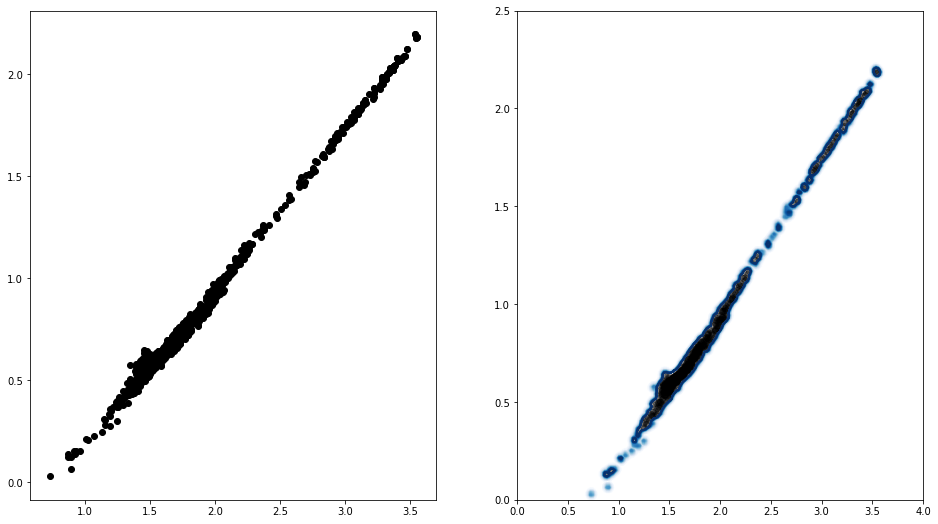

In [9]:
import statsmodels.api as sm
cols = ['log_numax', 'log_dnu']
dens_u = sm.nonparametric.KDEMultivariate(data=df[cols].values,
                        var_type='cc', bw='cv_ml')
print(dens_u.bw)
x = np.linspace(0.0, 4.0, 200)
y = np.linspace(0.0, 2.5, 200)
X, Y = np.meshgrid(x, y)
Z = np.zeros(X.shape)
print(Z.shape)
for idx, i in enumerate(x):
    for jdx, j in enumerate(y):
        Z[idx, jdx] = dens_u.pdf([X[idx, jdx], Y[idx, jdx]])
fig, ax = plt.subplots(1, 2, figsize=[16,9])
cs = ax[1].contour(X, Y, Z, levels=np.linspace(0, 1, 100), cmap='Blues')
ax[1].scatter(df[cols[0]], df[cols[1]], alpha=0.2, c='k')
ax[0].scatter(df[cols[0]], df[cols[1]], c='k')

[0.00365599 0.02163856]
(200, 200)


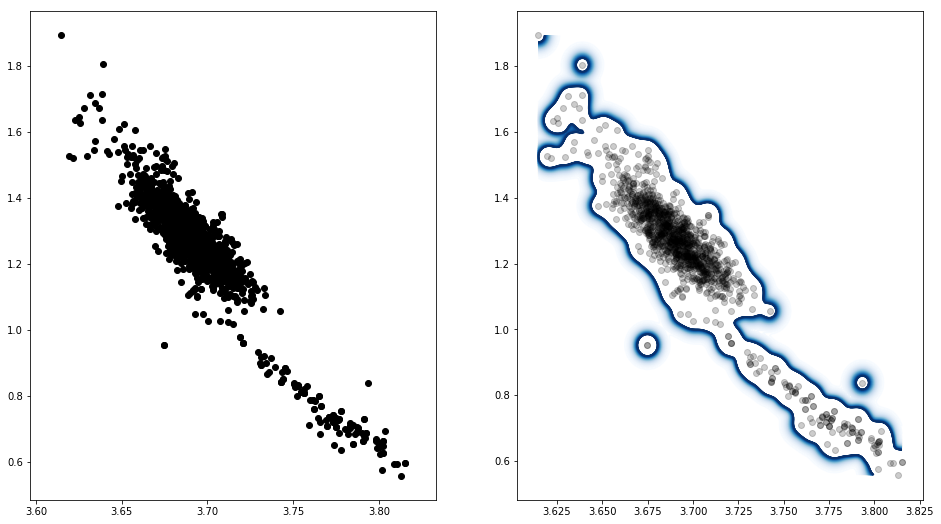

In [10]:
cols = ['log_Teff', 'bp_rp']
dens_u = sm.nonparametric.KDEMultivariate(data=df[cols].values,
                        var_type='cc', bw='cv_ml')
print(dens_u.bw)
x = np.linspace(df[cols[0]].min(), df[cols[0]].max(), 200)
y = np.linspace(df[cols[1]].min(), df[cols[1]].max(), 200)
X, Y = np.meshgrid(x, y)
Z = np.zeros(X.shape)
print(Z.shape)
for idx, i in enumerate(x):
    for jdx, j in enumerate(y):
        Z[idx, jdx] = dens_u.pdf([X[idx, jdx], Y[idx, jdx]])
fig, ax = plt.subplots(1, 2, figsize=[16,9])
cs = ax[1].contour(X, Y, Z, levels=np.linspace(0, 1, 100), cmap='Blues')
ax[1].scatter(df[cols[0]], df[cols[1]], alpha=0.2, c='k')
ax[0].scatter(df[cols[0]], df[cols[1]], c='k')

[0.03 0.03]
(200, 200)


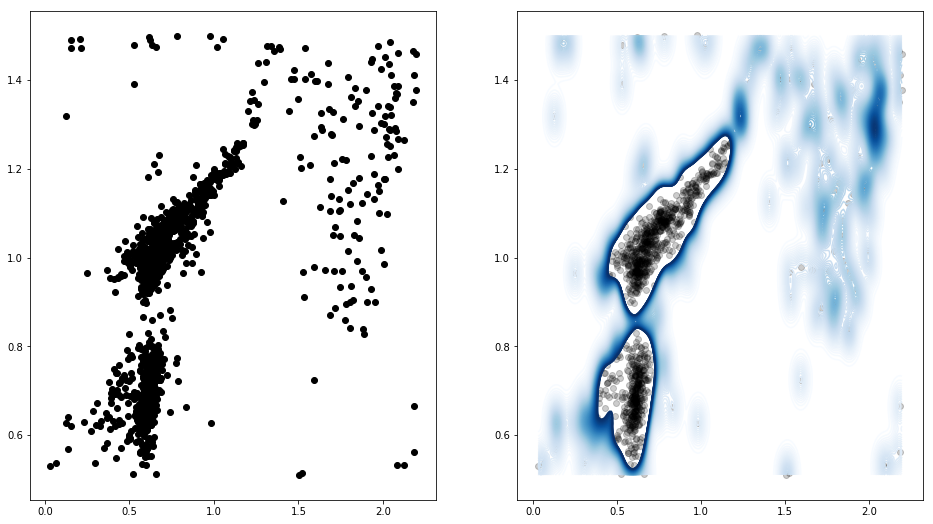

In [11]:
cols = ['log_dnu', 'eps']
dens_u = sm.nonparametric.KDEMultivariate(data=df[cols].values,
                        var_type='cc', bw=[0.03, 0.03])
print(dens_u.bw)
x = np.linspace(df[cols[0]].min(), df[cols[0]].max(), 200)
y = np.linspace(df[cols[1]].min(), df[cols[1]].max(), 200)
X, Y = np.meshgrid(x, y)
Z = np.zeros(X.shape)
print(Z.shape)
for idx, i in enumerate(x):
    for jdx, j in enumerate(y):
        Z[idx, jdx] = dens_u.pdf([X[idx, jdx], Y[idx, jdx]])
fig, ax = plt.subplots(1, 2, figsize=[16,9])
cs = ax[1].contour(X, Y, Z, levels=np.linspace(0, 1, 100), cmap='Blues')
ax[1].scatter(df[cols[0]], df[cols[1]], alpha=0.2, c='k')
ax[0].scatter(df[cols[0]], df[cols[1]], c='k')

/Users/davies/Library/Python/3.6/lib/python/site-packages/statsmodels/nonparametric/kernel_density.py:161: RuntimeWarning: invalid value encountered in log
  L += func(f_i)
/Users/davies/Library/Python/3.6/lib/python/site-packages/statsmodels/nonparametric/kernel_density.py:161: RuntimeWarning: divide by zero encountered in log
  L += func(f_i)


[0.01419127 0.02364931 0.00995797 0.11237306 0.04371931]
(200, 200)


/usr/local/Cellar/python3/3.6.4_2/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in log
  


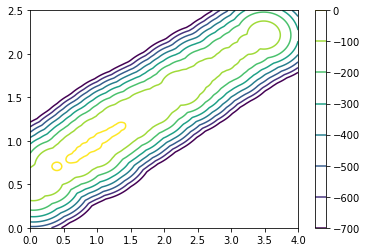

In [12]:
cols = ['log_dnu', 'log_numax', 'log_Teff', 'bp_rp', 'eps']
dens_u = sm.nonparametric.KDEMultivariate(data=df[cols].values,
                        var_type='ccccc', bw='cv_ml')
print(dens_u.bw)
x = np.linspace(0.0, 4.0, 200)
y = np.linspace(0.0, 2.5, 200)
X, Y = np.meshgrid(x, y)
Z = np.zeros(X.shape)
print(Z.shape)
for idx, i in enumerate(x):
    for jdx, j in enumerate(y):
        Z[idx, jdx] = dens_u.pdf([j, i, np.log10(4500), 1.5, 1.0])
fig, ax = plt.subplots()
cs = ax.contour(X, Y, np.log(Z))
fig.colorbar(cs)

In [13]:
epsilon.make_kde()

In [14]:
epsilon.obs = {'dnu': [10.0, 0.1], 'numax': [120.0, 1.0], 'teff': [4800.0, 70.0], 'bp_rp': [1.25, 0.01]}
epsilon.obs_to_log(epsilon.obs)
print(epsilon.log_obs)

{'dnu': [1.0, 0.004342944819032518], 'numax': [2.0791812460476247, 0.003619120682527098], 'teff': [3.681241237375587, 0.006333461194422422], 'bp_rp': [1.25, 0.01]}


In [15]:
epsilon.likelihood([np.log10(10.0), np.log10(120.0), np.log10(4800.0), 1.25, 1.2])

7.268008967796637

In [16]:
res = epsilon.kde_sampler()

In [17]:
print(res)

[[1.00537663 2.08164294 3.67782813 1.25080001 1.21342656]
 [1.00423729 2.08104701 3.67760503 1.25026365 1.20371836]
 [1.00437094 2.0805413  3.67752103 1.25055095 1.20319863]
 ...
 [1.00341534 2.07689482 3.67359218 1.2308888  1.23074347]
 [1.00262445 2.07631597 3.6812281  1.23820883 1.00570252]
 [1.00262445 2.07631597 3.6812281  1.23820883 1.00570252]]


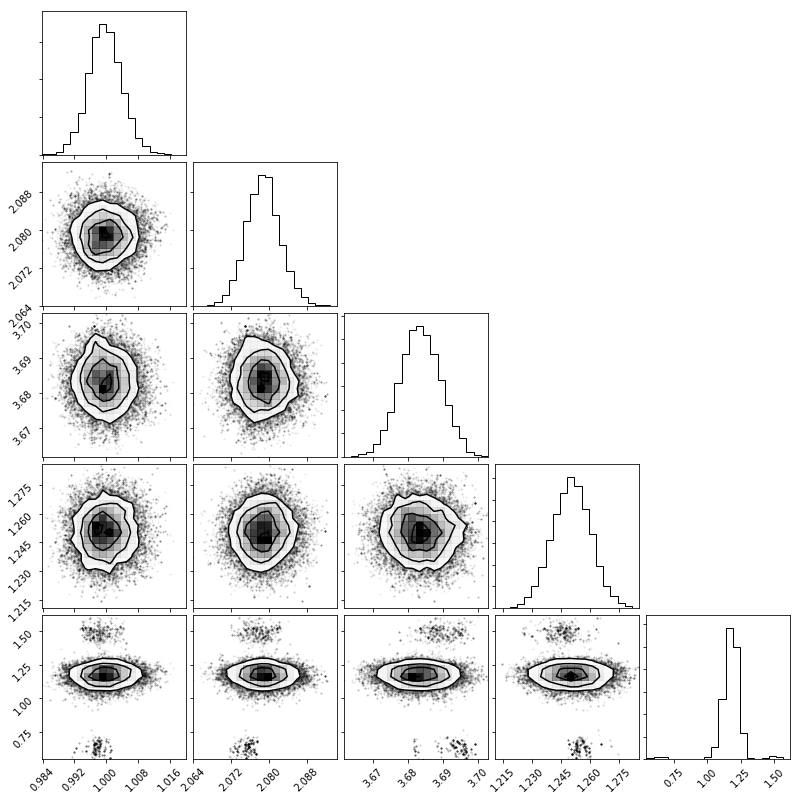

In [18]:
import corner
corner.corner(res)
plt.show()

In [19]:
print(np.median(res[:,4]), res[:,4].std())

1.1773153337134723 0.09870184539683247


In [20]:
epsilon_kde = pb.epsilon(method='KDE', verbose=True)
epsilon_kde(dnu=[10.0, 0.1], numax=[120.0, 1.0], teff=[4800.0, 70.0], bp_rp=[1.25, 0.01])


Reading in prior data
Building KDE
Running KDE sampler


[1.177462870119893, 0.06756944036929426]

In [21]:
epsilon_kde.kde_predict(np.array([7,8,9]))

(array([ 82.41349326,  92.40312783, 102.39276241]),
 array([0.79264303, 0.88773952, 0.98296855]))